# PAGA Connectivities

PAGA is run for the same sets of clusters for scATAC and scRNA. A heatmap can be plotted with cluster x cluster connectivities for scATAC and scRNA on the same plot. Plus links laid out on UMAP.

Inputs:
1. PAGA connectivities matrix for scATAC clusters (on converted cluster IDs [check])
2. PAGA connectivities matrix for scRNA on transfered clusters (on converted cluster IDs [check])
3. `metadata.tsv` with UMAP/densMAP coordinates, day and cluster.
4. Cluster config.

In [21]:
library(ggplot2)
library(reshape2)
library(scattermore)
# library(ggasym)

In [2]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14", "iPSC")

## Load Inputs

In [3]:
atac_conns = read.table("../../analysis/20200217_trajectory/sessions/20211003_n62599/connectivities.tsv")
atac_conns

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
c1,0.0000000000,9.138446e-01,0.0782488970,0.176025365,0.003155740,0.004401124,0.0030437589,0.0121634228,0.0007583391,0.0000000000,0.0000000000,0.000185710,0.000000000,0.000000e+00,0.0000000000
c2,0.9138445918,0.000000e+00,1.0000000000,0.602285237,0.163487562,1.000000000,0.5546205611,0.1348941315,0.2851682043,0.0005668188,0.0193963361,0.002919467,0.001887293,9.251735e-05,0.0000000000
c3,0.0782488970,1.000000e+00,0.0000000000,1.000000000,0.858374713,0.284722575,0.1173757785,0.0508390739,0.5005294777,0.0207864283,0.0577567162,0.004623172,0.003136123,7.633809e-04,0.0002705768
c4,0.1760253654,6.022852e-01,1.0000000000,0.000000000,0.388383119,0.046861425,0.1364148659,0.0020971468,0.0357515233,0.0012821624,0.0130537590,0.001000595,0.000000000,0.000000e+00,0.0000000000
c5,0.0031557397,1.634876e-01,0.8583747132,0.388383119,0.000000000,0.034425216,0.0277760231,0.0159837291,0.4204066266,0.9265492669,0.0159677311,0.008473544,0.056037228,1.346922e-02,0.0000000000
c6,0.0044011245,1.000000e+00,0.2847225746,0.046861425,0.034425216,0.000000000,1.0000000000,0.2834803154,0.5141039868,0.0228347014,0.2255067956,0.161877977,0.038015480,6.112489e-03,0.0061825749
c7,0.0030437589,5.546206e-01,0.1173757785,0.136414866,0.027776023,1.000000000,0.0000000000,0.8683877677,1.0000000000,0.0367814103,1.0000000000,0.098252666,0.010540300,1.968373e-04,0.0014651296
c8,0.0121634228,1.348941e-01,0.0508390739,0.002097147,0.015983729,0.283480315,0.8683877677,0.0000000000,0.0212853498,0.0000000000,0.9736343177,0.007942977,0.003177126,2.768826e-04,0.0020609348
c9,0.0007583391,2.851682e-01,0.5005294777,0.035751523,0.420406627,0.514103987,1.0000000000,0.0212853498,0.0000000000,1.0000000000,1.0000000000,1.000000000,0.072216907,4.855074e-03,0.0002868097


In [4]:
# rna_conns = read.table("../../analysis/20201005_RNA_trajectory/sessions/20201022_n59369_ATAC_20201022_n53906/connectivities.tsv")
# rna_conns

### ATAC MetaData

In [5]:
# should contain, sample_barcode as rowname, sample, umap1, umap2, cluster
metaData = read.table("../../analysis/20200206_pmat_snapATAC/sessions/20210717_n62599/metadata.tsv", header = T)
rownames(metaData) = paste(metaData$sample, metaData$barcode, sep='_')
metaData$sample = factor(metaData$sample, levels=DAYS)
dim(metaData)
head(metaData, 5)

[1] 62599     5

,barcode,sample,umap1,umap2,cluster
,<fct>,<fct>,<dbl>,<dbl>,<int>
D0_AAACACGCTAGTACGG,AAACACGCTAGTACGG,D0,-1.8037916,-9.507773,1
D0_AAACACGCTCTTCAAG,AAACACGCTCTTCAAG,D0,0.7074551,-9.406457,1
D0_AAACACGCTGATCCAT,AAACACGCTGATCCAT,D0,-2.9559933,-7.641148,1
D0_AAACCCTGACCGCTAG,AAACCCTGACCGCTAG,D0,-3.6119107,-8.443144,1
D0_AAACCCTGATTGCAGT,AAACCCTGATTGCAGT,D0,0.5002119,-8.759449,3


### Cluster Config

In [8]:
cluster_config = read.table("../../figures_factory/configs/cluster.tsv", comment.char = '', sep='\t', header=T)
cluster_config

cluster,colour,description,new_cluster
<int>,<fct>,<fct>,<int>
1,#B03743,Fibroblast,1
2,#E85F6D,Fibroblast-like,3
3,#7C2730,Fibroblast-like,2
4,#F0A118,Intermediate,12
5,#78A824,Pre-iPSC,13
6,#A6D854,Pre-iPSC,14
7,#F01D35,Fibroblast-like,5
8,#13C4A3,iPSC,15
9,#406614,Partially-reprogrammed,10


In [9]:
metaData$cluster_new_id = cluster_config[metaData$cluster, "new_cluster"]

## Join Matrices

~~Some clusters may be missing from one or the other matrix. Make a matrix with union of clusters with RNA connectivities upper triangle and ATAC connectivities lower triangle.~~

Currently plotting ATAC connectivities only.

In [12]:
all_clusts = colnames(atac_conns) #union(colnames(atac_conns),(colnames(rna_conns)))
conn_mat = matrix(0, length(all_clusts), length(all_clusts))
rownames(conn_mat) = all_clusts
colnames(conn_mat) = all_clusts

In [39]:
# fill in values
# ATAC lower triangle
for (i in seq(nrow(atac_conns))) {
    if (i>1) {
        for (j in seq(i-1)) {
            rw = colnames(atac_conns)[i]
            cl = colnames(atac_conns)[j]
            
            conn_mat[rw, cl] = atac_conns[rw, cl]
        }
    }
}

# RNA upper triangle
# for (i in seq(nrow(rna_conns))) {
#     if (i>1) {
#         for (j in seq(i-1)) {
#             cl = colnames(rna_conns)[i]
#             rw = colnames(rna_conns)[j]
            
#             conn_mat[rw, cl] = rna_conns[rw, cl]
#         }
#     }
# }

In [41]:
conn_mat

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
c1,0.0000000000,0.000000e+00,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.00000000,0.000000000,0
c2,0.9138445918,0.000000e+00,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.00000000,0.000000000,0
c3,0.0782488970,1.000000e+00,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.00000000,0.000000000,0
c4,0.1760253654,6.022852e-01,1.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.00000000,0.000000000,0
c5,0.0031557397,1.634876e-01,0.8583747132,0.388383119,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.00000000,0.000000000,0
c6,0.0044011245,1.000000e+00,0.2847225746,0.046861425,0.034425216,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.00000000,0.000000000,0
c7,0.0030437589,5.546206e-01,0.1173757785,0.136414866,0.027776023,1.000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.00000000,0.000000000,0
c8,0.0121634228,1.348941e-01,0.0508390739,0.002097147,0.015983729,0.283480315,0.8683877677,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.00000000,0.000000000,0
c9,0.0007583391,2.851682e-01,0.5005294777,0.035751523,0.420406627,0.514103987,1.0000000000,0.0212853498,0.0000000000,0.000000000,0.0000000000,0.000000000,0.00000000,0.000000000,0
c10,0.0000000000,5.668188e-04,0.0207864283,0.001282162,0.926549267,0.022834701,0.0367814103,0.0000000000,1.0000000000,0.000000000,0.0000000000,0.000000000,0.00000000,0.000000000,0


In [42]:
# remove "c" from rownames and colnames
rownames(conn_mat) = gsub("c", "", rownames(conn_mat))
colnames(conn_mat) = gsub("c", "", colnames(conn_mat))

## Plot

### Connectivities on UMAP

In [43]:
plot_dimred <- function(x, y, col, dimred="UMAP", subset=NULL, sz=0.5, alpha=1) {
    plot_df <- data.frame(x=x, y=y,
                 cluster=col)
    plot_df = plot_df[sample(dim(plot_df)[1]), ]
    
    if (!is.null(subset)) {
        plot_df = plot_df[plot_df$cluster==subset, ]
    }
    
    ggplot(plot_df) +
    geom_scattermore(pointsize=6.5, aes(x=x , y=y, col=cluster), alpha=alpha, pixels=c(5000,5000)) +
    theme_classic() +
    xlab(sprintf("%s 1", dimred)) + ylab(sprintf("%s 2", dimred)) +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
    coord_fixed()
}

In [44]:
# umap centroid  points per cluster
coords1 = rep(0, nrow(cluster_config))
coords2 = rep(0, nrow(cluster_config))

for (i in seq(nrow(cluster_config))) {
    coords1[i] = median(metaData[metaData$cluster_new_id==i, "umap1"])
    coords2[i] = median(metaData[metaData$cluster_new_id==i, "umap2"])
}

In [45]:
add_paga_conns_to_plot <- function(umap_plot, conns, coords1, coords2, thresh=0.2, line_scale=2) {
    # add edges
    for (i in seq(nrow(conns))) {
        ci = as.numeric(sub("c", "", rownames(conns)[i]))
        if (i>1) {
            for (j in seq(i-1)) {
               cj = as.numeric(sub("c", "", rownames(conns)[j]))
                if (conns[i, j] > thresh) {
                    umap_plot = umap_plot +
                        annotate("segment", 
                                 x = coords1[ci], 
                                 xend = coords1[cj], 
                                 y = coords2[ci],
                                 yend = coords2[cj],
                                 size=line_scale*conns[i, j])
                }
            }
        }
    }

    # add cluster labels
    for (i in as.numeric(sub("c", "", rownames(conns)))) {
         umap_plot = umap_plot + annotate(geom = "point", 
                                         x = coords1[i], y = coords2[i],
                                         colour = as.character(cluster_config[cluster_config$new_cluster==i,"colour"]), 
                                         size = 15) +
                                annotate(geom = "text", 
                                         x = coords1[i], y = coords2[i],
                                         label = sprintf("%d", i), 
                                         hjust = "center",
                                        size=7)
    }
    
    umap_plot
}

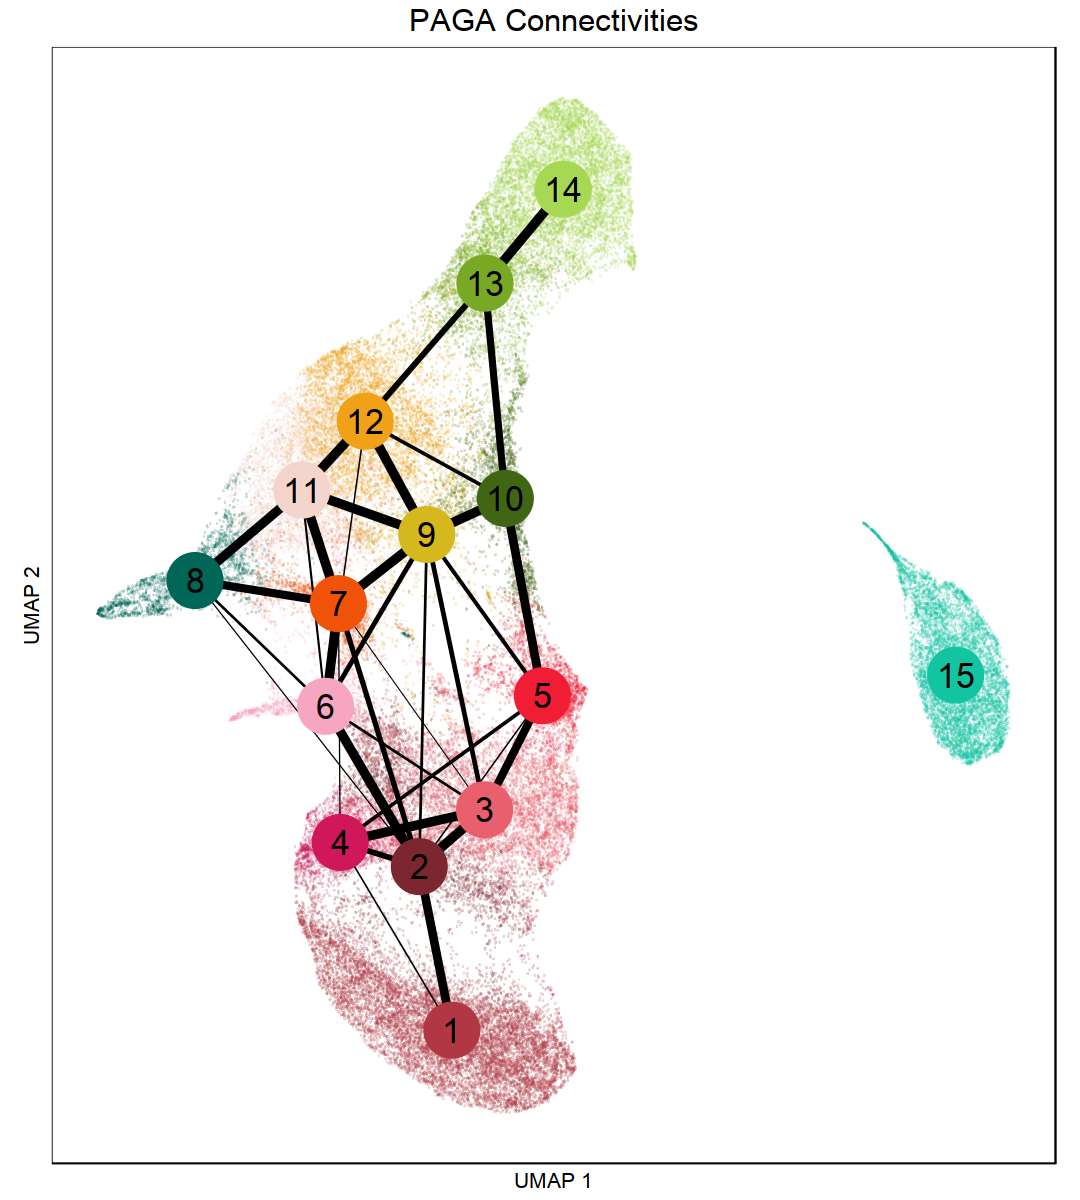

In [46]:
options(repr.plot.width = 9, repr.plot.height = 10)

atac_plot <- plot_dimred(metaData$umap1,
                         metaData$umap2,
                         factor(metaData$cluster_new_id),
                         alpha=0.2,
                         sz=0.25) + 
scale_color_manual(values=as.character(cluster_config$colour)[order(cluster_config$new_cluster)]) +
guides(colour = guide_legend(override.aes = list(shape=16, alpha=1, size=4))) +
ggtitle("PAGA Connectivities") +
theme(legend.position="none", plot.title=element_text(size=18)) 


atac_plot <- add_paga_conns_to_plot(atac_plot, atac_conns, coords1, coords2, thresh=0.1, line_scale=2)

atac_plot

In [47]:
(atac_conns)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
c1,0.0000000000,9.138446e-01,0.0782488970,0.176025365,0.003155740,0.004401124,0.0030437589,0.0121634228,0.0007583391,0.0000000000,0.0000000000,0.000185710,0.000000000,0.000000e+00,0.0000000000
c2,0.9138445918,0.000000e+00,1.0000000000,0.602285237,0.163487562,1.000000000,0.5546205611,0.1348941315,0.2851682043,0.0005668188,0.0193963361,0.002919467,0.001887293,9.251735e-05,0.0000000000
c3,0.0782488970,1.000000e+00,0.0000000000,1.000000000,0.858374713,0.284722575,0.1173757785,0.0508390739,0.5005294777,0.0207864283,0.0577567162,0.004623172,0.003136123,7.633809e-04,0.0002705768
c4,0.1760253654,6.022852e-01,1.0000000000,0.000000000,0.388383119,0.046861425,0.1364148659,0.0020971468,0.0357515233,0.0012821624,0.0130537590,0.001000595,0.000000000,0.000000e+00,0.0000000000
c5,0.0031557397,1.634876e-01,0.8583747132,0.388383119,0.000000000,0.034425216,0.0277760231,0.0159837291,0.4204066266,0.9265492669,0.0159677311,0.008473544,0.056037228,1.346922e-02,0.0000000000
c6,0.0044011245,1.000000e+00,0.2847225746,0.046861425,0.034425216,0.000000000,1.0000000000,0.2834803154,0.5141039868,0.0228347014,0.2255067956,0.161877977,0.038015480,6.112489e-03,0.0061825749
c7,0.0030437589,5.546206e-01,0.1173757785,0.136414866,0.027776023,1.000000000,0.0000000000,0.8683877677,1.0000000000,0.0367814103,1.0000000000,0.098252666,0.010540300,1.968373e-04,0.0014651296
c8,0.0121634228,1.348941e-01,0.0508390739,0.002097147,0.015983729,0.283480315,0.8683877677,0.0000000000,0.0212853498,0.0000000000,0.9736343177,0.007942977,0.003177126,2.768826e-04,0.0020609348
c9,0.0007583391,2.851682e-01,0.5005294777,0.035751523,0.420406627,0.514103987,1.0000000000,0.0212853498,0.0000000000,1.0000000000,1.0000000000,1.000000000,0.072216907,4.855074e-03,0.0002868097


In [33]:
ggsave(atac_plot, file=sprintf("./subfigs/%s_ATAC_PAGA_connectivities.pdf",
                                   format(Sys.Date(), "%Y%m%d")),
      useDingbats=F, height=10, width=9)

In [50]:
# saveRDS(atac_plot, file=sprintf("./subfigs/%s_ATAC_PAGA_connectivities.rds",
#                                    format(Sys.Date(), "%Y%m%d")))

---

In [19]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] reshape2_1.4.4 ggplot2_3.3.3 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5        pillar_1.4.6      compiler_3.6.3    plyr_1.8.6       
 [5] base64enc_0.1-3   tools_3.6.3       digest_0.6.25     uuid_0.1-4       
 [9] jsonlite_1.6.1    evaluate_0.14     lifecycle_0.2.0   tibble_3

Code below not run for now.

### Connectivity Matrix

In [12]:
melted_conn_mat = melt(conn_mat)

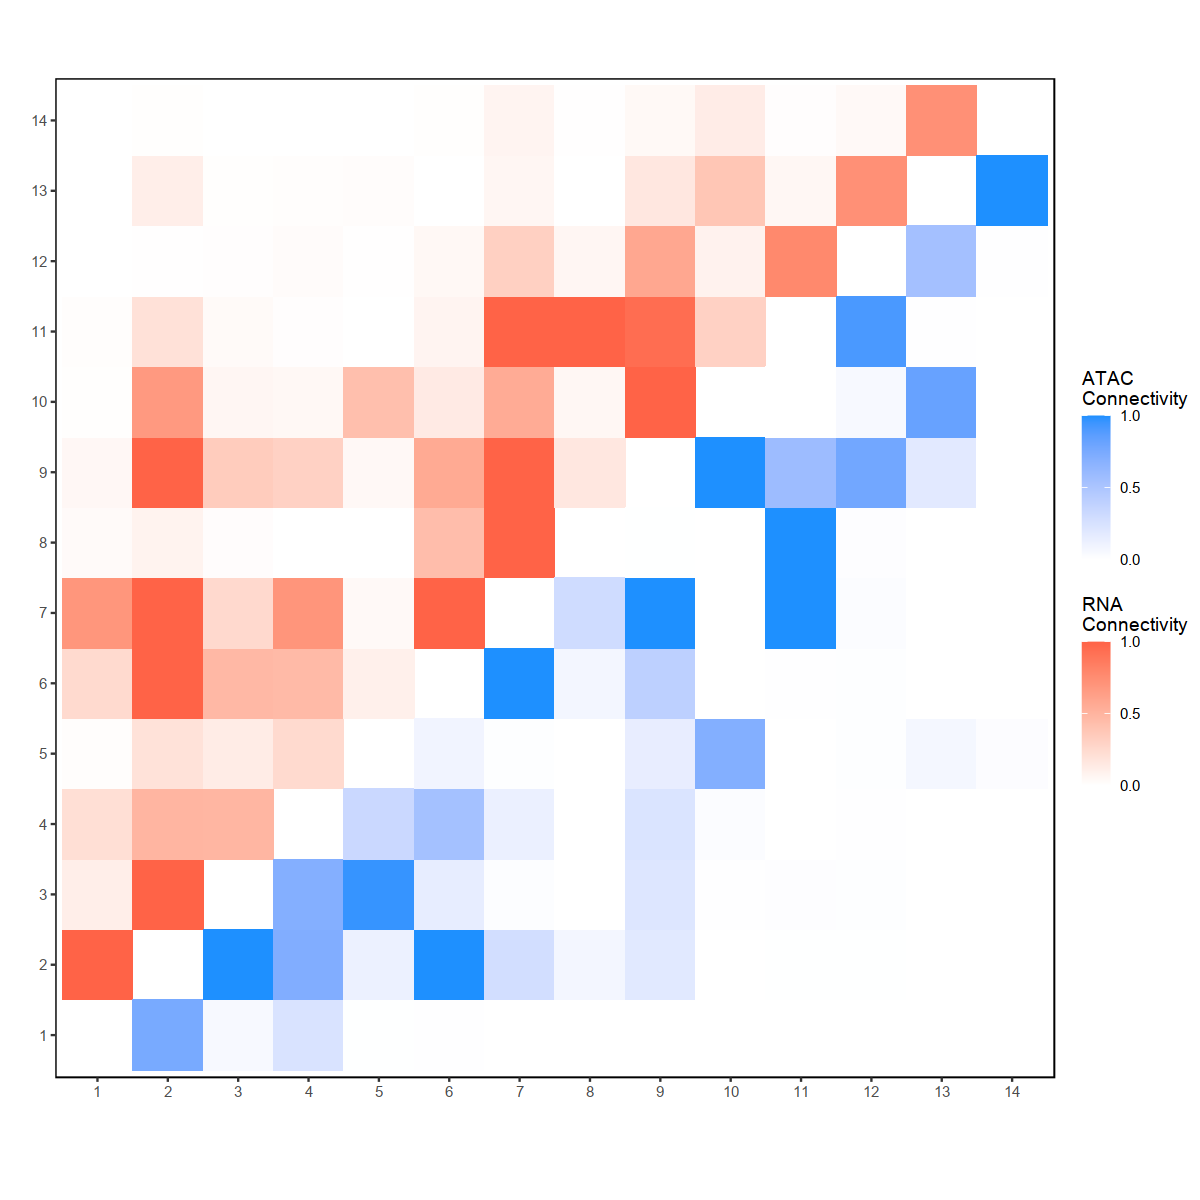

In [23]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(melted_conn_mat, aes(x = factor(Var1), y = factor(Var2))) +
    geom_asymmat(aes(fill_tl = value, fill_br = value)) +
    scale_fill_tl_gradient(low = "white", high = "tomato", name="RNA\nConnectivity", 
                           breaks=c(0,0.5,1)) +
#                           guide = guide_colourbar(direction = "horizontal",
#                                                    order = 3,
#                                                    title.position = "top")) +
    scale_fill_br_gradient(low = "white", high = "dodgerblue", name="ATAC\nConnectivity", 
                           breaks=c(0,0.5,1)) +
#                           guide = guide_colourbar(direction = "horizontal",
#                                                    order = 3,
#                                                    title.position = "top")) +
xlab("") + ylab("") +
theme(panel.background = element_rect(fill = "white"),
      panel.grid = element_blank(),
     panel.border = element_rect(colour = "black", fill=NA, size=.5)) +
coord_fixed()

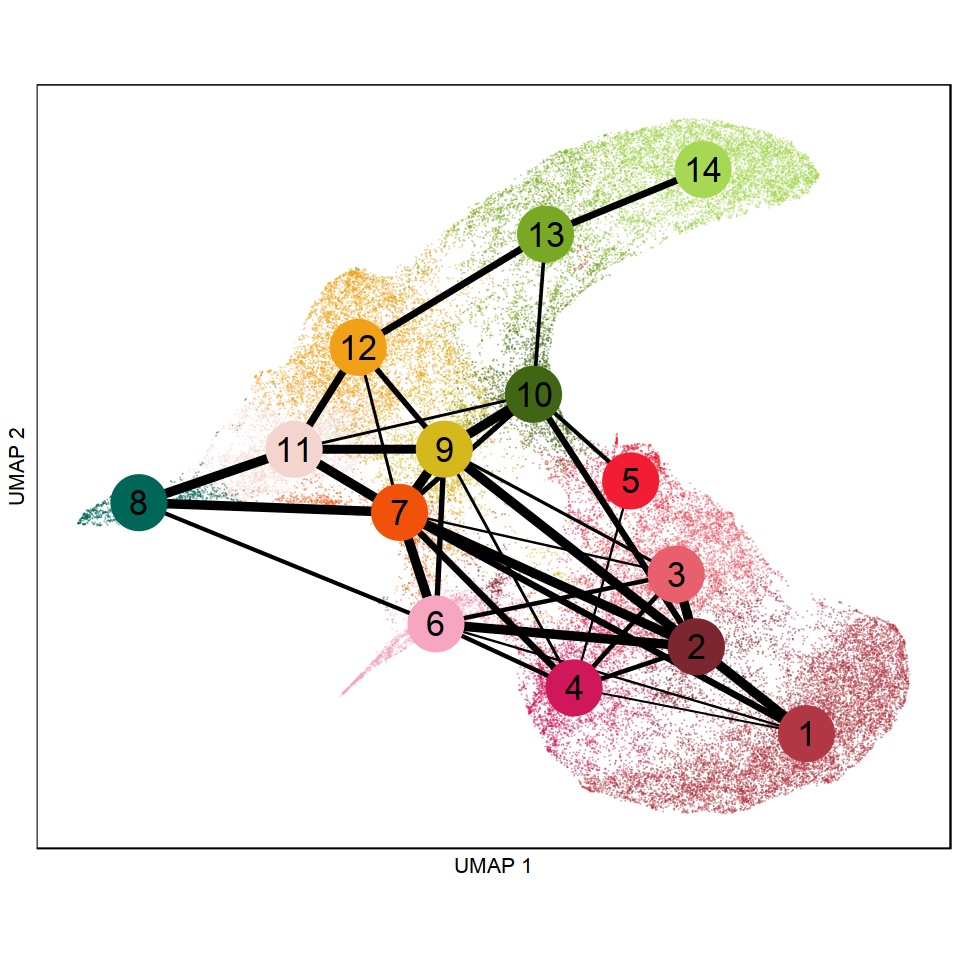

In [49]:
options(repr.plot.width = 8, repr.plot.height = 8)

rna_plot <- plot_dimred(metaData$umap1,
                         metaData$umap2,
                         factor(metaData$cluster_new_id),
                         alpha=0.5,
                         sz=0.25) + 
    scale_color_manual(values=as.character(cluster_config$colour)[order(cluster_config$new_cluster)]) +
    guides(colour = guide_legend(override.aes = list(shape=16, alpha=1, size=4))) +
    theme(legend.position="none",  plot.title=element_text(size=18))


rna_plot <- add_paga_conns_to_plot(rna_plot, rna_conns, coords1, coords2, thresh=0.2, line_scale=2)

rna_plot